In [0]:
import pandas as pd 
import cv2 
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from numpy import genfromtxt
from tensorflow.keras.models import load_model
%matplotlib inline


In [0]:
#y_test = genfromtxt('/content/y_test.csv', delimiter=',',dtype=str)
y_train = genfromtxt('/content/y_train.csv', delimiter=',',dtype=str)

In [65]:
x_train = np.loadtxt('/content/x_train.txt').astype(int)

# Note that this returned a 2D array!
print( x_train.shape)
x_train = x_train.reshape((3584,75,50))


(268800, 50)


In [66]:

tf.compat.v1.logging
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.2.0


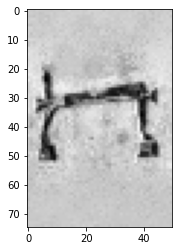

A55


In [67]:

plt.imshow(x_train[0],cmap='gray')
plt.show()
print(y_train[0])

In [68]:
#print(sorted(set(y_train)))
#print(sorted(set(y_test)))
set_list =sorted(set(y_train))
print(set_list,len(set_list))
with open('set_list.txt', 'w') as f:
    for item in set_list:
        f.write("%s\n" % item)

['A55', 'Aa15', 'Aa26', 'Aa27', 'Aa28', 'D1', 'D10', 'D156', 'D19', 'D2', 'D21', 'D28', 'D34', 'D35', 'D36', 'D39', 'D4', 'D46', 'D52', 'D53', 'D54', 'D56', 'D58', 'D60', 'D62', 'E1', 'E17', 'E23', 'E34', 'E9', 'F12', 'F13', 'F16', 'F18', 'F21', 'F22', 'F23', 'F26', 'F29', 'F30', 'F31', 'F32', 'F34', 'F35', 'F4', 'F40', 'F9', 'G1', 'G10', 'G14', 'G17', 'G21', 'G25', 'G26', 'G29', 'G35', 'G36', 'G37', 'G39', 'G4', 'G40', 'G43', 'G5', 'G50', 'G7', 'H6', 'I10', 'I5', 'I9', 'L1', 'M1', 'M12', 'M16', 'M17', 'M18', 'M195', 'M23', 'M26', 'M29', 'M3', 'M4', 'M40', 'M41', 'M42', 'M44', 'M8', 'N1', 'N14', 'N16', 'N17', 'N18', 'N19', 'N2', 'N24', 'N25', 'N26', 'N29', 'N30', 'N31', 'N35', 'N36', 'N37', 'N41', 'N5', 'O1', 'O11', 'O28', 'O29', 'O31', 'O34', 'O4', 'O49', 'O50', 'O51', 'P1', 'P13', 'P6', 'P8', 'P98', 'Q1', 'Q3', 'Q7', 'R4', 'R8', 'S24', 'S28', 'S29', 'S34', 'S42', 'T14', 'T20', 'T21', 'T22', 'T28', 'T30', 'U1', 'U15', 'U28', 'U33', 'U35', 'U7', 'V13', 'V16', 'V22', 'V24', 'V25', 'V28'

In [69]:
 keys = np.arange(1, 171, 1).tolist()
 print(keys)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


In [70]:
label_dict = dict(zip(keys,set_list))
print(label_dict)

{1: 'A55', 2: 'Aa15', 3: 'Aa26', 4: 'Aa27', 5: 'Aa28', 6: 'D1', 7: 'D10', 8: 'D156', 9: 'D19', 10: 'D2', 11: 'D21', 12: 'D28', 13: 'D34', 14: 'D35', 15: 'D36', 16: 'D39', 17: 'D4', 18: 'D46', 19: 'D52', 20: 'D53', 21: 'D54', 22: 'D56', 23: 'D58', 24: 'D60', 25: 'D62', 26: 'E1', 27: 'E17', 28: 'E23', 29: 'E34', 30: 'E9', 31: 'F12', 32: 'F13', 33: 'F16', 34: 'F18', 35: 'F21', 36: 'F22', 37: 'F23', 38: 'F26', 39: 'F29', 40: 'F30', 41: 'F31', 42: 'F32', 43: 'F34', 44: 'F35', 45: 'F4', 46: 'F40', 47: 'F9', 48: 'G1', 49: 'G10', 50: 'G14', 51: 'G17', 52: 'G21', 53: 'G25', 54: 'G26', 55: 'G29', 56: 'G35', 57: 'G36', 58: 'G37', 59: 'G39', 60: 'G4', 61: 'G40', 62: 'G43', 63: 'G5', 64: 'G50', 65: 'G7', 66: 'H6', 67: 'I10', 68: 'I5', 69: 'I9', 70: 'L1', 71: 'M1', 72: 'M12', 73: 'M16', 74: 'M17', 75: 'M18', 76: 'M195', 77: 'M23', 78: 'M26', 79: 'M29', 80: 'M3', 81: 'M4', 82: 'M40', 83: 'M41', 84: 'M42', 85: 'M44', 86: 'M8', 87: 'N1', 88: 'N14', 89: 'N16', 90: 'N17', 91: 'N18', 92: 'N19', 93: 'N2', 

In [0]:
def get_key(val,my_dict): 
    for key, value in my_dict.items(): 
         if val == value: 
             return key 
  
    return 'unknown'
 

In [72]:
y_train_key = np.zeros((3584,)).astype(int)
for i in range(len(y_train)):
  y_train_key[i]=(get_key(y_train[i],label_dict))
print(y_train_key,y_train_key.shape,max(y_train_key))

[  1   2   2 ... 170 170 170] (3584,) 170


In [0]:
with open('y_train_key.txt', 'w') as f:
    for item in y_train_key:
        f.write("%s\n" % item)

In [74]:
#this
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train_key, test_size=0.2)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(2867, 75, 50) (2867,)
(717, 75, 50) (717,)


In [75]:
#this
x_train_reshaped=np.reshape(X_train,(2867,3750))
x_test_reshaped=np.reshape(X_test,(717,3750))
print('x_train_reshape ssssssshape:',x_train_reshaped.shape)

x_train_reshape ssssssshape: (2867, 3750)


In [0]:
#this
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = 1e-10
x_train_norm = (x_train_reshaped-x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped-x_mean)/(x_std+epsilon)

In [0]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(Y_train)
y_test_encoded= to_categorical(Y_test)

In [78]:
y_test_mod_encoded = np.zeros((717,171))
print(y_train_encoded.shape)
print(y_test_encoded.shape)
it =0
#for item in y_test_encoded:
#  item = item.tolist()
#  item.append(0)
#  y_test_mod_encoded[it] = item
#  it+=1
#print(y_test_mod_encoded.shape)

(2867, 171)
(717, 171)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128,activation='relu',input_shape=(3750,)),
    Dense(128,activation='relu'),
    Dense(171,activation='softmax')
])

In [80]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               480128    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 171)               22059     
Total params: 518,699
Trainable params: 518,699
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.fit(x_train_norm,y_train_encoded,epochs=5)
model.save('/content/Mymodel.h5')

Epoch 1/5
90/90 [==============================] - 0s 4ms/step - loss: 1.1625 - accuracy: 0.7928
Epoch 2/5
90/90 [==============================] - 0s 4ms/step - loss: 1.0053 - accuracy: 0.8169
Epoch 3/5
90/90 [==============================] - 0s 4ms/step - loss: 0.8696 - accuracy: 0.8371
Epoch 4/5
90/90 [==============================] - 0s 4ms/step - loss: 0.7684 - accuracy: 0.8507
Epoch 5/5
90/90 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.8734


In [83]:
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('test set accuracu',accuracy*100)

23/23 [==============================] - 0s 2ms/step - loss: 1.1368 - accuracy: 0.7908
test set accuracu 79.07949686050415


In [84]:
model.save('mymodel_final')
preds = model.predict(x_test_norm)
print('shape of preds',preds.shape)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mymodel_final/assets
shape of preds (717, 171)


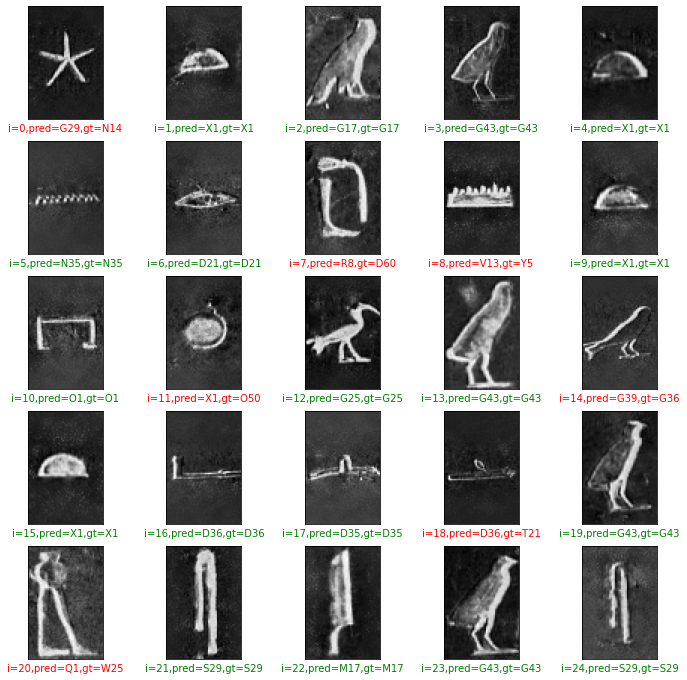

In [85]:
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(preds[start_index+i])
    label_pred = label_dict[pred]

    gt = label_dict[Y_test[start_index+i]]
    col='g'
    if label_pred != gt:
        col='r'
    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,label_pred,gt),color=col)
    plt.imshow(X_test[start_index+i],cmap='binary')
plt.show()

In [0]:
x_val = x_test.reshape(455,3750)
x_val_norm = (x_val-x_mean)/(x_std+epsilon)

In [0]:
new_pred = model.predict(x_val_norm)
plt.figure(figsize=(12,12))
start_index=0
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(new_pred[start_index+i])
    label_pred_new = label_dict[pred]

    
    
    plt.xlabel('i={},pred={}'.format(start_index+i,label_pred_new))
    plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()

In [0]:
model.save('model',save_format='h5')

In [0]:
model2 = load_model('/content/model')

In [92]:
test  = model2.predict(x_test_norm)
print(test.shape)

(717, 171)


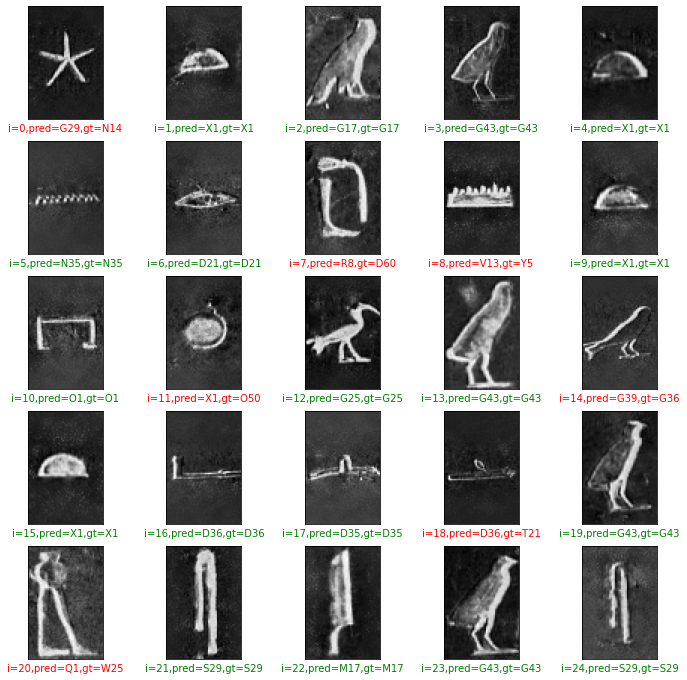

In [94]:
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(test[start_index+i])
    label_pred = label_dict[pred]

    gt = label_dict[Y_test[start_index+i]]
    col='g'
    if label_pred != gt:
        col='r'
    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,label_pred,gt),color=col)
    plt.imshow(X_test[start_index+i],cmap='binary')
plt.show()

In [0]:
np.save('label_dict.npy', label_dict) 

# Load
#read_dictionary = np.load('my_file.npy',allow_pickle='TRUE').item()